In [1]:
from os import path
from sklearn.datasets import fetch_mldata
DOWNLOAD_PATH = path.join('datasets', 'MNIST')

mnist = fetch_mldata('MNIST original', data_home=DOWNLOAD_PATH)

<function matplotlib.pyplot.show>

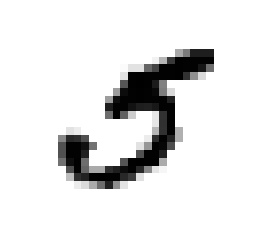

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
X, y = mnist['data'], mnist['target']
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [5]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=200, tol=0.001)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

In [6]:
sgd_clf.predict([some_digit])

array([False])

In [7]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='recall')

array([0.91200885, 0.9192031 , 0.54952961])

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[52101,  2478],
       [ 1119,  4302]], dtype=int64)

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_train_5, y_train_pred)
r = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)
print('precision: {0:.3f} recall: {1:.3f} F1: {2:.3f}'.format(p, r, f1))

precision: 0.635 recall: 0.794 F1: 0.705


In [10]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

precision: 1.000 recall: 0.000


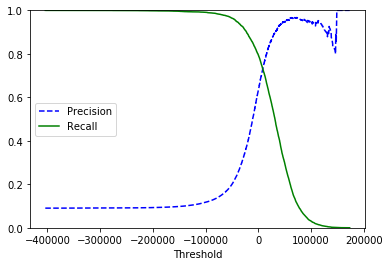

In [11]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

print('precision: {0:.3f} recall: {1:.3f}'.format(precisions[-1], recalls[-1]))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

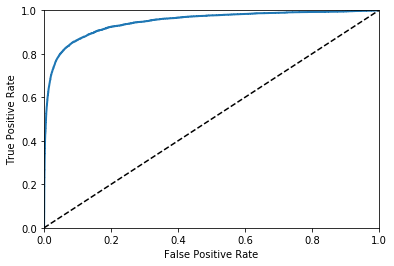

In [12]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [13]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [14]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -38187.04109742,  -93268.72482428,  -40781.52690594,
         -38271.99948253, -101342.31169275,   -3997.69827928,
         -86067.12794066,  -68420.76383845,  -53404.42793273,
         -67500.49388058]])

In [15]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=1000, tol=0.001))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([3.])

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

C:\Users\yucai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\yucai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\yucai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.90996801, 0.91044552, 0.90993649])

In [17]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\yucai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\yucai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\yucai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:451: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5642,    1,   17,   11,   10,   66,   41,    9,  123,    3],
       [   2, 6443,   47,   30,    5,   47,    4,   10,  140,   14],
       [  29,   33, 5310,  106,   77,   30,   73,   44,  243,   13],
       [  34,   25,  128, 5364,    1,  228,   26,   44,  206,   75],
       [  14,   18,   50,   10, 5296,   13,   47,   25,  170,  199],
       [  41,   25,   33,  177,   54, 4628,   83,   18,  285,   77],
       [  28,   20,   45,    2,   43,   97, 5584,   10,   89,    0],
       [  21,   15,   67,   36,   53,    9,    4, 5769,   61,  230],
       [  23,   77,   50,  104,    4,  140,   36,   11, 5335,   71],
       [  26,   26,   28,   78,  124,   34,    1,  198,  198, 5236]],
      dtype=int64)

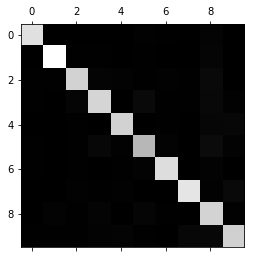

In [18]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [19]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

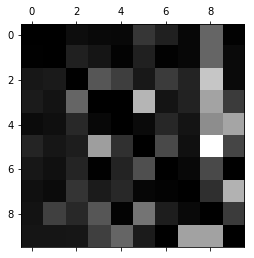

In [20]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [21]:
sgd_clf.predict([some_digit])

array([5.])

In [22]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
train_noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + train_noise
test_noise = np.random.randint(0 , 100, (len(X_test), 784))
X_test_mod = X_test + test_noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(digit):
    d = digit.reshape(28, 28)
    plt.imshow(d, cmap=matplotlib.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)